In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm

In [2]:
N_steps = 600
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

In [3]:
result_loc = "./../../../Server_results/05_13_2021/"
train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1620834677/"

In [4]:
run_name = "experiment13_05_12_45_14"
q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([-1,N_k,N_steps])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([-1,N_k,N_steps])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([-1,N_k,N_steps])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([-1,N_k,N_steps])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([-1,N_k,N_steps])
p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

In [5]:
q_x.shape

(2, 64, 600)

In [6]:
p.shape

(2, 64)

In [7]:
# df_k_imp = pd.read_csv(f"{result_loc}check_initialq_x.txt",sep='\t',header=None)

In [8]:
def plot_cdf(p,qoi,time_step,epoch):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(QOI[index],np.cumsum(P))


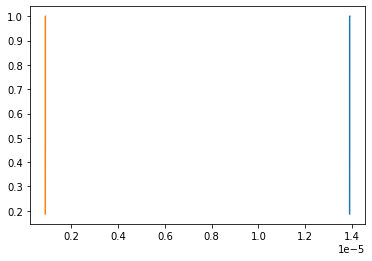

In [9]:
plot_cdf(p,q_x,0,1)
plot_cdf(p,q_y,0,1)

In [10]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


In [11]:
q_MC_x.shape

(100, 1800)

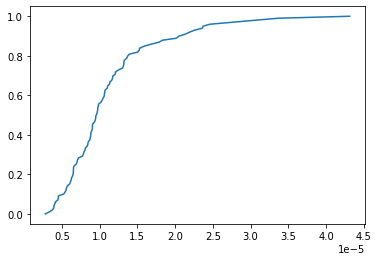

In [12]:
Q_MC = q_MC_x[:,1256]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

# Q_MC = q_MC_x[0,0]

# index_MC = np.argsort(Q_MC)
# plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

In [13]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [14]:
Q_MC

array([1.36011539e-05, 4.53877672e-06, 1.16193436e-05, 5.71700595e-06,
       9.05269472e-06, 8.84802224e-06, 8.37132739e-06, 9.75010545e-06,
       4.06444502e-06, 7.74796260e-06, 2.80736684e-06, 1.20877164e-05,
       1.68189907e-05, 5.26042798e-06, 3.06179450e-05, 1.01963258e-05,
       3.36301717e-05, 9.62373155e-06, 1.30308144e-05, 1.20905546e-05,
       7.91069686e-06, 2.13265189e-05, 6.53830530e-06, 9.06830965e-06,
       1.13510815e-05, 8.49024072e-06, 8.86954516e-06, 7.01085299e-06,
       9.05002949e-06, 1.13146463e-05, 3.34486007e-06, 6.41542429e-06,
       1.03392135e-05, 6.49741081e-06, 6.13490412e-06, 9.74399979e-06,
       2.36098961e-05, 1.06160596e-05, 1.24496119e-05, 3.94807076e-06,
       9.32076464e-06, 1.52650290e-05, 3.93230516e-06, 1.83393024e-05,
       3.74449467e-06, 7.08095441e-06, 8.11550877e-06, 8.68863316e-06,
       5.43622424e-06, 1.04629361e-05, 1.06961369e-05, 9.68923686e-06,
       8.44549625e-06, 4.54120691e-06, 6.03719993e-06, 1.37077348e-05,
      

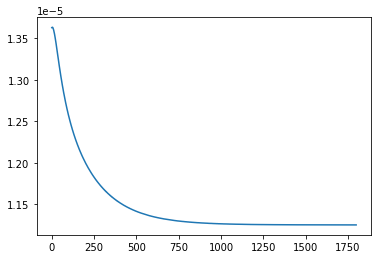

In [15]:
plt.plot(q_MC_x.mean(axis=0))

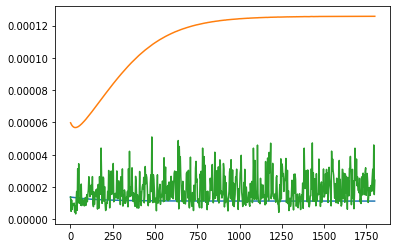

In [23]:
plt.plot(q_MC_x.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[0,:,:].mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[1,0:4,:].mean(axis=0))

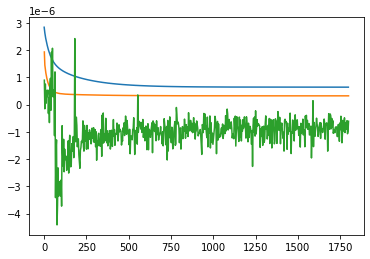

In [24]:
plt.plot(q_MC_y.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[0,:,:].mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[1,0:4,:].mean(axis=0))